In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import keras
keras.__version__

'2.1.5'

In [35]:
from keras.datasets import mnist

In [36]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [37]:
train_images.shape

(60000, 28, 28)

3

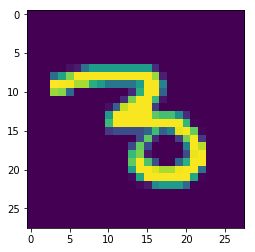

In [38]:
plt.imshow(train_images[30])
train_labels[30]

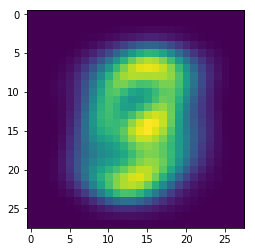

In [39]:
plt.imshow(train_images.mean(axis=0))

In [22]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [23]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [25]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [26]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.2606 - acc: 0.9248
Epoch 2/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.1036 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 20s 328us/step - loss: 0.0677 - acc: 0.97960s - loss: 0.0681 - a
Epoch 4/5
60000/60000 [==============================] - 25s 413us/step - loss: 0.0496 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 26s 441us/step - loss: 0.0369 - acc: 0.9887


In [28]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 109us/step


[0.06764013416569215, 0.9791]

In [42]:
train_images_mean = train_images.mean(axis=0)

In [44]:
train_images_mean.shape

(28, 28)

In [45]:
train_images_mean = train_images_mean.reshape((1, 28 * 28))

In [48]:
network.predict_classes(train_images_mean)

array([8], dtype=int64)